In [1]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

In [2]:
def distance(p1, p2) -> float:
    ret = 0;
    v = [(x-y)**2 for x,y in zip(p1, p2)]
    return math.sqrt(sum(v))

assert(distance([0, 0, 1], [0, 0, 1])==0)
assert(distance([0, 0, 1], [0, 0, 0])==1)

In [80]:
maxes = []
avgs = []
mins = []

for dim in range(1, 90):
    points = [random_point(dim) for _ in range(100)]
    distances = []
    for p1 in points:
        for p2 in points:
            if p1!=p2:
                distances.append(distance(p1, p2))
            
    m = np.max(distances)
    i = np.min(distances)
    a = np.average(distances)
    
    maxes.append(m)
    mins.append(i)
    avgs.append(a)
    

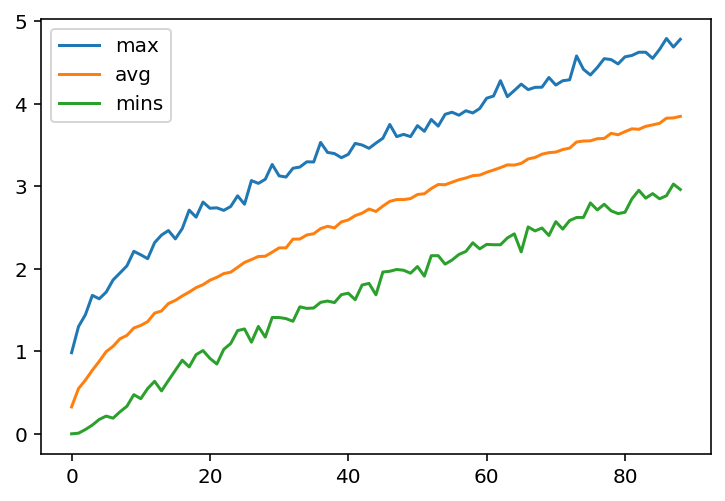

In [91]:
plt.plot(maxes, label='max')
plt.plot(avgs, label='avg')
plt.plot(mins, label='mins')
plt.legend();

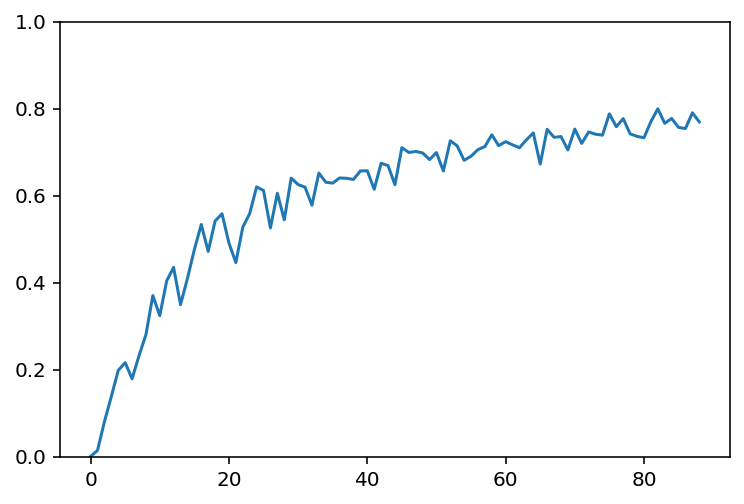

In [89]:
plt.plot([y/x for x,y in zip(avgs, mins)])
plt.ylim(0, 1);

## knn

In [97]:
points = [random_point(2) for _ in range(100)]
npp = random_point(2)

In [131]:
def k_nearest(k, points, new_point):
    byd = sorted(points, key=lambda lp: distance(lp, new_point))
    return byd[:k]

In [132]:
ax, ay = zip(*points)
kax, kay = zip(*k_nearest(5, points, npp))

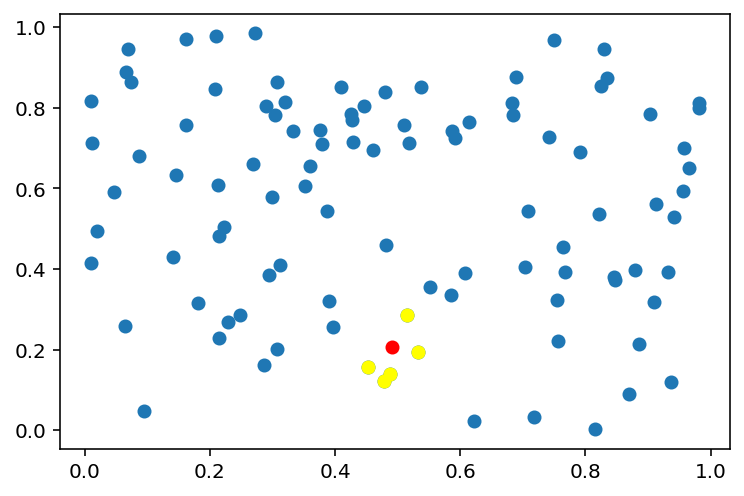

In [134]:
plt.scatter(ax, ay)
plt.scatter(npp[0], npp[1], c='red')
plt.scatter(kax, kay, c='yellow');

## scikit learn version

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error


In [62]:
iris = load_iris()

In [63]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2)

In [65]:
scaler =StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
res = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    res.append(mean_squared_error(y_pred, y_test))

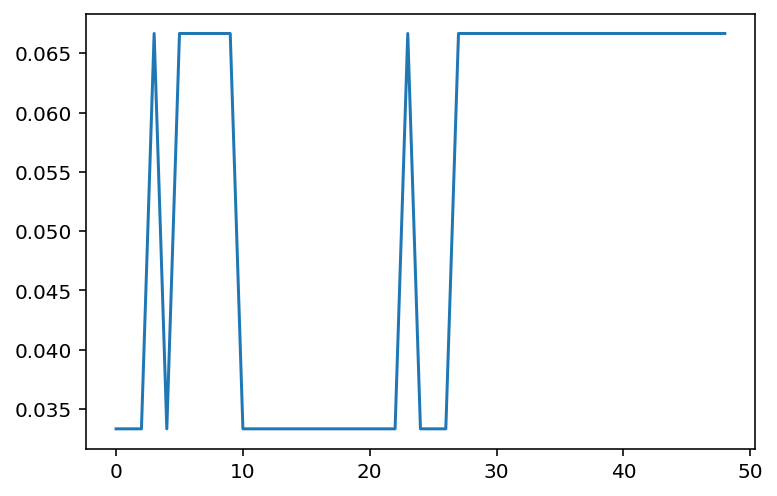

In [76]:
plt.plot(res)

In [81]:
## total empirical risk:
list(y_pred != y_test).count(True)/len(y_pred)

0.06666666666666667